# follow-trend

    1. S&P 500 index closes above its 200 day moving average
    2. The stock closes above its upper band, buy
    
    1. S&P 500 index closes below its 200 day moving average
    2. The stock closes below its lower band, sell your long position.
    
    (multiple securities)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from talib.abstract import *

import pinkfish as pf
import strategy

# format price data
pd.options.display.float_format = '{:0.2f}'.format

%matplotlib inline

In [2]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

Some global data

In [3]:
capital = 10000
start = datetime.datetime(2000, 1, 1)
end = datetime.datetime.now()

Define symbols

In [4]:
# S&P All Sectors
symbols = ['SPY', 'XLB', 'XLE', 'XLF', 'XLI', 'XLK', 'XLP', 'XLU', 'XLV', 'XLY']
# Other Sectors
symbols += ['RSP', 'DIA', 'IWM', 'QQQ', 'DAX', 'EEM', 'TLT', 'GLD', 'XHB']

# Elite Stocks
symbols = ['ADP', 'BMY', 'BRK-B', 'BTI', 'BUD', 'CL', 'CLX', 'CMCSA', 'DIS', 'DOV']
symbols += ['GIS', 'HD', 'HRL', 'HSY', 'INTC', 'JNJ', 'K', 'KMB', 'KMI', 'KO']
symbols += ['LLY', 'LMT', 'MCD', 'MO', 'MRK', 'MSFT', 'NUE', 'PG', 'PM', 'RDS-B']
symbols += ['SO', 'T', 'UL', 'V', 'VZ', 'XOM']

Run Strategy

In [5]:
strategies = pd.Series(dtype=object)
for symbol in symbols:
    print("{0}".format(symbol), end=" ")
    strategies[symbol] = strategy.Strategy(symbol, capital, start, end, use_adj=True,
                                           sma_period=200, percent_band=3.5, regime_filter=True)
    strategies[symbol].run()
    _, strategies[symbol].tlog, strategies[symbol].dbal = strategies[symbol].get_logs()
    strategies[symbol].stats = strategies[symbol].get_stats()

ADP BMY BRK-B BTI BUD CL CLX CMCSA DIS DOV GIS HD HRL HSY INTC JNJ K KMB KMI KO LLY LMT MCD MO MRK MSFT NUE PG PM RDS-B SO T UL V VZ XOM 

Summarize results

In [6]:
metrics = ('start',
           'annual_return_rate',
           'max_closed_out_drawdown',
           'sharpe_ratio',
           'sortino_ratio',
           'monthly_std',
           'annual_std',
           'pct_time_in_market',
           'total_num_trades',
           'pct_profitable_trades',
           'avg_points')

df = strategy.summary(strategies, metrics)
pd.set_option('display.max_columns', len(df.columns))
df

,ADP,BMY,BRK-B,BTI,BUD,CL,CLX,CMCSA,DIS,DOV,GIS,HD,HRL,HSY,INTC,JNJ,K,KMB,KMI,KO,LLY,LMT,MCD,MO,MRK,MSFT,NUE,PG,PM,RDS-B,SO,T,UL,V,VZ,XOM
start,2000-01-03,2000-01-03,2000-01-03,2000-01-03,2010-04-16,2000-01-03,2000-01-03,2000-01-03,2000-01-03,2000-01-03,2000-01-03,2000-01-03,2000-01-03,2000-01-03,2000-01-03,2000-01-03,2000-01-03,2000-01-03,2011-11-25,2000-01-03,2000-01-03,2000-01-03,2000-01-03,2000-01-03,2000-01-03,2000-01-03,2000-01-03,2000-01-03,2008-12-29,2000-01-03,2000-01-03,2000-01-03,2000-01-03,2008-12-31,2000-01-03,2000-01-03
annual_return_rate,4.12,2.25,3.36,8.79,-0.17,1.34,2.43,3.03,9.27,3.59,1.52,4.18,5.58,6.19,-0.76,1.16,-0.76,0.58,1.46,2.69,3.05,7.19,5.00,5.28,1.69,4.05,0.66,1.31,-0.75,1.01,2.05,0.10,1.42,11.85,-0.44,1.66
max_closed_out_drawdown,-32.08,-37.04,-36.07,-47.56,-32.42,-42.17,-41.64,-55.14,-31.69,-33.85,-25.12,-54.26,-31.16,-29.47,-66.96,-25.29,-41.72,-41.87,-21.63,-30.05,-59.70,-34.34,-25.51,-42.66,-50.98,-49.73,-62.71,-24.03,-47.40,-43.35,-37.17,-44.13,-37.01,-37.36,-41.84,-30.53
sharpe_ratio,0.35,0.23,0.35,0.63,0.07,0.17,0.25,0.26,0.60,0.29,0.19,0.34,0.47,0.55,0.07,0.17,-0.02,0.11,0.17,0.30,0.27,0.56,0.45,0.44,0.19,0.32,0.14,0.18,0.01,0.14,0.25,0.07,0.17,0.70,0.02,0.19
sortino_ratio,0.38,0.20,0.37,0.74,0.08,0.17,0.25,0.26,0.70,0.31,0.19,0.37,0.48,0.59,0.06,0.16,-0.02,0.11,0.19,0.29,0.23,0.60,0.47,0.43,0.19,0.30,0.14,0.17,0.01,0.15,0.25,0.07,0.16,0.79,0.02,0.19
monthly_std,3.64,4.21,3.15,4.21,4.19,2.91,3.15,4.65,4.47,4.83,2.91,4.32,3.79,3.57,5.85,2.65,2.57,2.96,3.83,3.01,4.51,3.90,3.36,4.07,3.72,4.29,5.99,2.74,3.65,4.13,2.97,3.10,3.31,5.07,3.34,3.48
annual_std,12.93,13.62,12.54,18.72,14.55,10.41,9.92,16.30,15.98,17.45,10.14,17.06,15.90,15.12,20.71,11.24,9.82,10.90,8.10,9.33,14.35,19.07,14.54,14.31,14.44,17.50,25.13,8.54,12.92,14.33,10.81,11.12,11.63,19.03,10.46,11.86
pct_time_in_market,61.81,46.60,56.45,56.89,62.83,54.37,56.04,54.21,56.89,56.54,53.07,60.19,55.15,50.23,52.60,48.58,45.86,53.53,54.31,50.10,50.43,56.89,52.97,55.40,50.89,53.83,48.95,55.24,57.58,53.55,51.61,47.86,51.17,74.93,48.06,48.49
total_num_trades,50,46,47,71,25,54,63,44,52,49,60,50,65,54,67,60,55,56,16,60,56,66,55,61,52,53,50,48,36,56,65,49,49,36,52,54
pct_profitable_trades,44.00,30.43,42.55,50.70,32.00,42.59,49.21,40.91,46.15,28.57,45.00,36.00,44.62,48.15,32.84,33.33,40.00,35.71,62.50,43.33,41.07,45.45,38.18,37.70,38.46,35.85,26.00,37.50,33.33,41.07,43.08,40.82,36.73,38.89,38.46,48.15


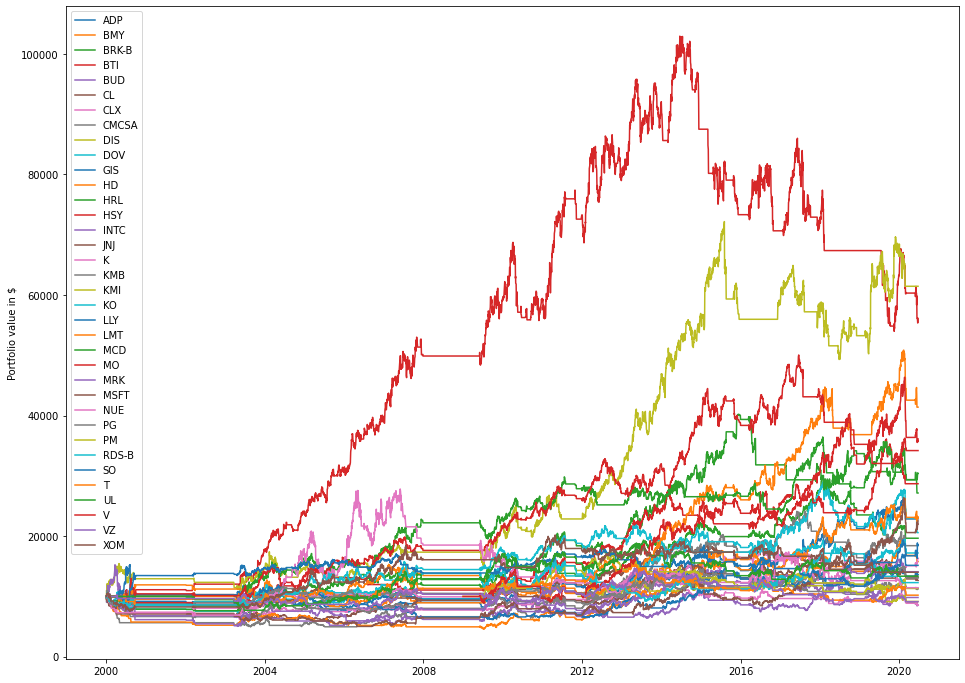

In [7]:
pf.plot_equity_curves(strategies)